Problem je izbira šminke za mojo punco. Vse šminke so medseboj različne, tako da manjvrednih variant ni bilo. Sprva sem mislil da bo večina atributov bolj kot ne tipa DA/NE, vendar so me podatki prijetno presenetili. Podatki so bili izbrani iz strani proizvajalca, raznih Google iskanj, predvsem pa iz <a href="https://www.makeupalley.com/"> Makeup Alley</a>. Punca je na podlagi večih uporabniških mnenj podatke grobo ocenila. Razne izpise sem v poročilu pustil, da vidite kako se podatki spreminjajo skozi čas. 

In [1]:
import pandas as pd


In [2]:
sminke = pd.read_excel(open('sminke.xls','rb'), sheetname='List1')
sminke

,ZNAMKA,SERIJA,Cena,Obstojnost,Sled,Vlazilnost,Tekstura,Nanos,Vonj,Dostopnost,St. odtenkov,Testirano na zivalih,Izgled,Prekrivnost,Stopnjevanje,Uporabniska ocena
0,Revlon,Super Lustrous Lipstick,5.89,6,malo,0.60,kremasto,direktno,smrdi,lahka,46,NE,mat,0.75,80,4.2
1,L'Oreal,Color Riche,8.95,6,malo,0.85,gladko,direktno,neprijeten,lahka,6,NE,svetlec,0.65,70,3.9
2,Rimmel,Lasting Finish by Kate Moss,6.50,2,ja,0.70,gladko,copic,mocen,lahka,4,NE,svetlec,0.85,30,3.8
3,Kylie Cosmetics,Matte Lip Kits,29.00,6,ne,0.30,tekoče,copic,prijeten,tezka,8,NE,mat,0.95,90,3.1
4,ABH (Anastasia Beverly Hills),Liquid Lipstick,20.00,2,ne,0.25,kremasto,direktno,prijeten,srednja,7,NE,mat,0.90,30,3.7
5,Jeffree Star,Velour Liquid Lipstick,18.00,12,ne,0.35,kremasto,copic,neprijeten,tezka,9,DA,mat,0.95,80,4.2
6,Maybelline,Color Sensational The Mattes,7.49,2,ja,0.70,gladko,direktno,neprijeten,lahka,4,DA,mat,0.60,65,4.1


Tako izgleda tabela s podatki. Zaradi lažjega parsanja so podatki malce okrnjeni, zato jih bom natančneje opisal tule.
<h2>Kriteriji:</h2>
<ul>
<li> <b>Cena:</b> izražena je v dolarjih.</li>
<li> <b>Obstojnost:</b> grob približek koliko ur šminka ostane nanešena.</li>
<li> <b>Sled:</b> besedni opis koliko sledi pusti šminka. </li>
<li> <b>Vlažilnost:</b> 1.00 bi bila popolnoma tekoča šminka, 0 pa...kamen? </li>
<li> <b>Tesktura:</b> opiše kakšna je šminka na otip po nanosu na ustnice. </li>
<li> <b>Vonj:</b> tu je bilo največ debate, zaključila sva da močen vonj je nekaj vmes, neprijeten pa je lahko smrad ali le neprijeten. </li>
<li> <b>Dostopnost:</b> da nisva preveč pisala sva podatke okrnila. Lahka pomeni da jo prodajajo v Sloveniji v trgovinah, srednja da se jo lahko naroči prek spleta iz bližnjih Evropskih držav, težka pa so spletne trgovine iz npr. ZDA, kjer je poštnina izredno draga.</li>
<li> <b>St. odtenkov:</b> koliko različnih odtenkov v seriji barvno ustreza preferencam punce. </li>
<li> <b>Testirano na zivalih:</b> mislim sem da bo verjetno pri vseh ne (Jeffree Star je zelo zaveden vegan npr. vendar vseeno testira na živalih...), izkazalo se je da temu ni tako.</li>
<li> <b>Izgled:</b> mat je barva, ki ne odseva svetlobe, svetleča pa svetlobo še kako dobro odseva.</li>
<li> <b>Prekrivnost: </b> to nam pove kolikšen delež ustnic je prekrit po prvem nanosu.</li>
<li> <b>Stopnjevanje: </b> rangirano 1-100, pove nam koliko se šminke pozna če čeznjo nanesemo še eno (druge barve). Boljša stopnja pomeni da se barva zmeša kakor bi se npr. tempere, slabša pa da pride ven res čudna barva.</li>
<li> <b>Uporabniška ocena: </b> prepisana iz strani Makeup Alley. </li>
</ul>

Po tem je bilo treba kriterije hierarhično urediti, nato jim določiti uteži. Tu sem odločitve prepustil popolnoma nji, rezultat je sledeče drevo (z utežmi):
![title](./drevo2.png)

Izpeljani kriteriji so v pravokotnikih. Pri tem sem ji nekoliko pomagal, da sva sestavila smiselne skupine. Uteži sva delala na podlagi ocen (najbolj pomembna je 100, koliko so vse ostale v primerjavi z najbolj pomembno). Izkazalo se je da je vlažilnost izjemno pomembna, vendar je cena vseeno bolj, tehnika pa je tudi malo bolj. 

In [3]:
class Attributes:
    def __init__(self, key):
        self.root=AttributeNode(key, None, 100)
    def addChild(self, whom, what, weight):
        self.root.addChild(whom, what, weight)
    def printTree(self):
        self.root.printTree()
    def findNode(self, what):
        return self.root.findNode(what)
    def normalizeWeights(self):
        self.root.weight=1
        self.root.children[0].normalizeWeights()
    def weighWeights(self):
        self.root.weighWeights(1)
    def getArray(self):
        return self.root.arrayNodes()


In [4]:
global allNodes 
allNodes=[]

In [5]:
class AttributeNode:
    def __init__(self,key, parent, weight):
        self.key=key
        self.parent=parent
        self.weight=weight
        self.children=[]
        self.normalized=False
    def addChild(self, whom, what, weight):
        if self.key == whom:
            self.children.append(AttributeNode(what, self, weight))
            return True
        if len(self.children)>0:
            for i in self.children:
                i.addChild(whom, what, weight)
        return False
    def printTree(self):
        if self is None:
            return False
        print(str(self.key)+" weight: "+str(self.weight))
        if len(self.children)>0:
            print("with children: ")
        for i in self.children:
            i.printTree()
        return True    
    def findNode(self, what):
        return True
    def arrayNodes(self):
        allNodes.extend(self.children)
        for i in self.children:
            allNodes.extend(i.children) 
            i.arrayNodes()
        #return allKids
    def normalizeWeights(self):
        if self == None:
            return False
        nodeNo=0
        nodeSum=0
        for i in self.parent.children:
            nodeSum+=i.weight
        for i in self.parent.children:
            if i.normalized == False:
                i.weight=i.weight/nodeSum
                i.normalized = True
            if len(i.children)>0:
                i.children[0].normalizeWeights()
    def weighWeights(self, w):
        if self == None:
            return
        self.weight=self.weight*w
        for i in self.children:
            i.weighWeights(self.weight)

Drevo zgradim kar na roke, saj je vedno isto. 

In [6]:
atributi = Attributes("Izbira")
atributi.addChild("Izbira","Stvari", 95)
atributi.addChild("Stvari","Cena", 100)
atributi.addChild("Stvari", "St. odtenkov", 40)
atributi.addChild("Stvari", "Dodana vrednost", 70)
atributi.addChild("Dodana vrednost", "Dostopnost", 100)
atributi.addChild("Dodana vrednost", "Uporabniska ocena", 40)
atributi.addChild("Dodana vrednost", "Testirano na zivalih", 20)

atributi.addChild("Izbira", "Kvaliteta", 100)
atributi.addChild("Kvaliteta", "Tehnika", 100)
atributi.addChild("Tehnika", "Obstojnost", 100)
atributi.addChild("Tehnika", "Sled", 20)
atributi.addChild("Tehnika", "Prekrivnost", 100)

atributi.addChild("Kvaliteta", "Fizika", 90)
atributi.addChild("Fizika", "Tekstura", 40)
atributi.addChild("Fizika", "Nanos", 20)
atributi.addChild("Fizika", "Stopnjevanje", 15)
atributi.addChild("Fizika", "Izgled", 50)
atributi.addChild("Fizika", "Udobje", 100)

atributi.addChild("Udobje", "Vlazilnost", 100)
atributi.addChild("Udobje", "Vonj", 20)

atributi.printTree()

Izbira weight: 100
with children: 
Stvari weight: 95
with children: 
Cena weight: 100
St. odtenkov weight: 40
Dodana vrednost weight: 70
with children: 
Dostopnost weight: 100
Uporabniska ocena weight: 40
Testirano na zivalih weight: 20
Kvaliteta weight: 100
with children: 
Tehnika weight: 100
with children: 
Obstojnost weight: 100
Sled weight: 20
Prekrivnost weight: 100
Fizika weight: 90
with children: 
Tekstura weight: 40
Nanos weight: 20
Stopnjevanje weight: 15
Izgled weight: 50
Udobje weight: 100
with children: 
Vlazilnost weight: 100
Vonj weight: 20


In [7]:
atributi.normalizeWeights()
atributi.printTree()

Izbira weight: 1
with children: 
Stvari weight: 0.48717948717948717
with children: 
Cena weight: 0.47619047619047616
St. odtenkov weight: 0.19047619047619047
Dodana vrednost weight: 0.3333333333333333
with children: 
Dostopnost weight: 0.625
Uporabniska ocena weight: 0.25
Testirano na zivalih weight: 0.125
Kvaliteta weight: 0.5128205128205128
with children: 
Tehnika weight: 0.5263157894736842
with children: 
Obstojnost weight: 0.45454545454545453
Sled weight: 0.09090909090909091
Prekrivnost weight: 0.45454545454545453
Fizika weight: 0.47368421052631576
with children: 
Tekstura weight: 0.17777777777777778
Nanos weight: 0.08888888888888889
Stopnjevanje weight: 0.06666666666666667
Izgled weight: 0.2222222222222222
Udobje weight: 0.4444444444444444
with children: 
Vlazilnost weight: 0.8333333333333334
Vonj weight: 0.16666666666666666


In [8]:
atributi.weighWeights()
atributi.printTree()

Izbira weight: 1
with children: 
Stvari weight: 0.48717948717948717
with children: 
Cena weight: 0.23199023199023197
St. odtenkov weight: 0.09279609279609279
Dodana vrednost weight: 0.16239316239316237
with children: 
Dostopnost weight: 0.10149572649572648
Uporabniska ocena weight: 0.04059829059829059
Testirano na zivalih weight: 0.020299145299145296
Kvaliteta weight: 0.5128205128205128
with children: 
Tehnika weight: 0.26990553306342774
with children: 
Obstojnost weight: 0.12268433321064896
Sled weight: 0.024536866642129795
Prekrivnost weight: 0.12268433321064896
Fizika weight: 0.24291497975708498
with children: 
Tekstura weight: 0.043184885290148446
Nanos weight: 0.021592442645074223
Stopnjevanje weight: 0.016194331983805665
Izgled weight: 0.05398110661268555
Udobje weight: 0.1079622132253711
with children: 
Vlazilnost weight: 0.08996851102114259
Vonj weight: 0.017993702204228516


In [9]:
atributi.getArray()
allNodes2=set(allNodes)
import collections
weights = collections.defaultdict(float)
for i in allNodes2:
    weights[i.key]=i.weight
#weights["Cena"]=

In [10]:
print(weights.items())

dict_items([('Vlazilnost', 0.08996851102114259), ('Obstojnost', 0.12268433321064896), ('Udobje', 0.1079622132253711), ('Cena', 0.23199023199023197), ('Sled', 0.024536866642129795), ('Testirano na zivalih', 0.020299145299145296), ('Tehnika', 0.26990553306342774), ('Vonj', 0.017993702204228516), ('Dodana vrednost', 0.16239316239316237), ('Uporabniska ocena', 0.04059829059829059), ('Tekstura', 0.043184885290148446), ('Prekrivnost', 0.12268433321064896), ('Stvari', 0.48717948717948717), ('Fizika', 0.24291497975708498), ('Stopnjevanje', 0.016194331983805665), ('Nanos', 0.021592442645074223), ('Izgled', 0.05398110661268555), ('Dostopnost', 0.10149572649572648), ('St. odtenkov', 0.09279609279609279), ('Kvaliteta', 0.5128205128205128)])


V zgornjih nekaj celicah sem ustvaril podatkovno strukturo ki hrani drevo, rezultate uteži sem tudi preveril na kalkulator in je vse pravilno. Za hitrejši lookup sem si ustvaril tudi slovar uteži. Sedaj je bilo treba pretvoriti podatke v koristnosti.
<h2>Koristnostne funkcije:</h2>
<ul>
<li> <b>Cena:</b> obratna linearna funkcija.</li>
<li> <b>Obstojnost:</b> linearna funkcija.</li>
<li> <b>Sled:</b> linearna funkcija (ne-0, malo-50, da- 100) </li>
<li> <b>Vlažilnost:</b> odsekovna linearna funkcija, 0.50-0, 0.75-100, 0.85-50, vse več kot 0.85 pa je 0 
![funkcija](./vlazilnost.png)</li>
<li> <b>Tesktura:</b> MacBeth (kremasto-100, gladko-67, tekoče-0) </li>
<li> <b>Vonj:</b> linearna (smrdi-0, meprijeten-25, mocen-50, prijeten-100) </li>
<li> <b>Dostopnost:</b> lookup tabela (tezka-0, srednja-70, lahka-100)</li>
<li> <b>St. odtenkov:</b> linearna</li>
<li> <b>Testirano na zivalih:</b> DA/NE = 0/100.</li>
<li> <b>Izgled:</b> mat/svetleča = 100/0.</li>
<li> <b>Prekrivnost: </b> linearna</li>
<li> <b>Stopnjevanje: </b> linearna</li>
<li> <b>Uporabniška ocena: </b> linearna </li>
</ul>

In [11]:
def makeLinFunction(mini,maxi, podatek):
    razpon=maxi-mini
    #print(razpon)
    return float((podatek-mini)/razpon)*100
def makeReverseLinFunction(mini,maxi, podatek):
    razpon=maxi-mini
    return float(abs(podatek-maxi)/razpon)*100
print(makeReverseLinFunction(20,120,30))

90.0


In [12]:
count=0
print(sminke.ix[:,13])
mini=min(sminke.ix[:,13])
maxi=max(sminke.ix[:,13])
data=[]
for i in sminke.ix[:,13]:
    print("%.2f usefulness: %.2f"%(i,makeLinFunction(mini,maxi,i)))
    data.append(makeLinFunction(mini,maxi,i))
df3 = pd.DataFrame(data, columns=["prekrivnost"])

0    0.75
1    0.65
2    0.85
3    0.95
4    0.90
5    0.95
6    0.60
Name: Prekrivnost, dtype: float64
0.75 usefulness: 42.86
0.65 usefulness: 14.29
0.85 usefulness: 71.43
0.95 usefulness: 100.00
0.90 usefulness: 85.71
0.95 usefulness: 100.00
0.60 usefulness: 0.00


In [13]:
data=collections.defaultdict(list)
cols=[]
for i in range(2,16):
    
    if sminke.columns[i] == "Cena":
        mini=min(sminke.ix[:,i])
        maxi=max(sminke.ix[:,i])
        for j in sminke.ix[:,i]:
            data["Cena"].append(makeReverseLinFunction(mini,maxi,j))
        cols.append("Cena")
            
    elif sminke.columns[i] == "Sled":
        for j in sminke.ix[:,i]:
            if j == "ne":
                data["Sled"].append(0)
            elif j == "malo":
                data["Sled"].append(50)
            else:
                data["Sled"].append(100)
        cols.append("Sled")
                
    elif sminke.columns[i] == "Tekstura":
        for j in sminke.ix[:,i]:
            if j == "kremasto":
                data["Tekstura"].append(100)
            elif j == "gladko":
                data["Tekstura"].append(67)
            else:
                data["Tekstura"].append(0)
    
    elif sminke.columns[i] == "Nanos" or sminke.columns[i] == "Testirano na zivalih" or sminke.columns[i] == "Izgled":
        for j in sminke.ix[:,i]:
            data[sminke.columns[i]].append(int(j == "copic" or j == "NE" or j=="mat"))
        cols.append(sminke.columns[i])
    
    elif sminke.columns[i] == "Vonj": #nisem ze zatipkal, takšna je "lookup tabela"
        for j in sminke.ix[:,i]:
            if j == "smrdi":
                data[sminke.columns[i]].append(0)
            elif j == "neprijeten":
                data[sminke.columns[i]].append(25)
            elif j == "mocen":
                data[sminke.columns[i]].append(50)
            else:
                data[sminke.columns[i]].append(100)
        cols.append("Vonj")
        
    elif sminke.columns[i] == "Dostopnost":
        for j in sminke.ix[:,i]:
            if j == "lahka":
                data[sminke.columns[i]].append(100)
            elif j == "srednja":
                data[sminke.columns[i]].append(70)
            else:
                data[sminke.columns[i]].append(0)
        cols.append("Dostopnost")
        
    elif sminke.columns[i] == "Vlazilnost":
        for j in sminke.ix[:,i]:
            j*=100
            if j>70:
                if j>85:
                    data[sminke.columns[i]].append(0)
                else:
                    data[sminke.columns[i]].append(makeReverseLinFunction(70,100,j)) #85 mora biti 50, vse več pa je 0
            else:
                if j<50:
                    data[sminke.columns[i]].append(0)
                else:
                    data[sminke.columns[i]].append(makeLinFunction(50,70,j))
        cols.append("Vlazilnost")
                
    else:
        mini=float(min(sminke.ix[:,i]))
        maxi=float(max(sminke.ix[:,i]))
        for j in sminke.ix[:,i]:
            data[sminke.columns[i]].append(makeLinFunction(mini,maxi,j))
        cols.append(sminke.columns[i])
            

In [14]:
weightedData = collections.defaultdict(list)
for i,j in data.items():
    temp=[]
    for k in j:
        temp.append(k*weights[i])
    weightedData[i]=temp
weights["Cena"]

0.23199023199023197

In [15]:
data

defaultdict(list,
            {'Cena': [100.0,
              86.75897879705755,
              97.36045002163566,
              0.0,
              38.944180008654264,
              47.598442232799655,
              93.07659022068368],
             'Dostopnost': [100, 100, 100, 0, 70, 0, 100],
             'Izgled': [1, 0, 0, 1, 1, 1, 1],
             'Nanos': [0, 0, 1, 1, 0, 1, 0],
             'Obstojnost': [40.0, 40.0, 0.0, 40.0, 0.0, 100.0, 0.0],
             'Prekrivnost': [42.85714285714285,
              14.28571428571427,
              71.42857142857142,
              100.0,
              85.71428571428574,
              100.0,
              0.0],
             'Sled': [50, 50, 100, 0, 0, 0, 100],
             'St. odtenkov': [100.0,
              4.761904761904762,
              0.0,
              9.523809523809524,
              7.142857142857142,
              11.904761904761903,
              0.0],
             'Stopnjevanje': [83.33333333333334,
              66.6666666666666

In [51]:
names={}
for j in range(0,7): 
    names[j]=str(sminke.iloc[j,0])+" "+str(sminke.iloc[j,1])
#names
print(list(names.values()))

['Revlon Super Lustrous Lipstick', "L'Oreal Color Riche", 'Rimmel Lasting Finish by Kate Moss', 'Kylie Cosmetics Matte Lip Kits', 'ABH (Anastasia Beverly Hills) Liquid Lipstick', 'Jeffree Star Velour Liquid Lipstick', 'Maybelline Color Sensational The Mattes']


In [56]:
tmp=[]
for j in range(0,7): 
    tmp.append((str(sminke.iloc[j,0])))
tmp

['Revlon',
 "L'Oreal",
 'Rimmel',
 'Kylie Cosmetics',
 'ABH (Anastasia Beverly Hills)',
 'Jeffree Star',
 'Maybelline']

In [17]:
sminkeKoristnosti = pd.DataFrame(list(weightedData.values()), list(weightedData.keys()))
sminkeKoristnosti.rename(columns=names, inplace=True)

In [18]:
sminkeKoristnosti

,Revlon Super Lustrous Lipstick,L'Oreal Color Riche,Rimmel Lasting Finish by Kate Moss,Kylie Cosmetics Matte Lip Kits,ABH (Anastasia Beverly Hills) Liquid Lipstick,Jeffree Star Velour Liquid Lipstick,Maybelline Color Sensational The Mattes
Obstojnost,4.907373,4.907373,0.000000,4.907373,0.000000,12.268433,0.000000
Sled,1.226843,1.226843,2.453687,0.000000,0.000000,0.000000,2.453687
Stopnjevanje,1.349528,1.079622,0.000000,1.619433,0.000000,1.349528,0.944669
Vlazilnost,4.498426,4.498426,8.996851,0.000000,0.000000,0.000000,8.996851
Testirano na zivalih,0.020299,0.020299,0.020299,0.020299,0.020299,0.000000,0.000000
Vonj,0.000000,0.449843,0.899685,1.799370,1.799370,0.449843,0.449843
Prekrivnost,5.257900,1.752633,8.763167,12.268433,10.515800,12.268433,0.000000
Uporabniska ocena,4.059829,2.952603,2.583528,0.000000,2.214452,4.059829,3.690754
Tekstura,4.318489,2.893387,2.893387,0.000000,4.318489,4.318489,2.893387
Nanos,0.000000,0.000000,0.021592,0.021592,0.000000,0.021592,0.000000


Tako izgleda končna tabela z vsemi uteženimi koristnostmi, vse kar mi je preostalo je sešteti koristnosti po stolpcih in pregledati rezultate.

In [116]:
sums=collections.defaultdict(float)
sumsraw=collections.defaultdict(float)
sminke.iloc[4,1]
print(sminkeKoristnosti.iloc[1,2])

2.45368666421


In [117]:
import numpy as np
for j in range(0,7): #stvar je narobe obrnjena
    name=str(sminke.iloc[j,0])+" "+str(sminke.iloc[j,1]) 
    #print(np.sum(sminkeKoristnosti.iloc[:,j]))
    sums[name] = np.sum(sminkeKoristnosti.iloc[:,j])
    sumsraw[j]=np.sum(sminkeKoristnosti.iloc[:,j])
        
        
        
        

Ustvaril sem 2 slovarja, en hrani vrednosti po imenih, drugi pa po indeksih v tabeli. Lahko bi bolje naredil in prihranil nekaj spomina, vendar bom za izris izpisoval le zname (da ne zasede preveč prostora), za izpise pa polna imena.

In [118]:
sums

defaultdict(float,
            {'ABH (Anastasia Beverly Hills) Liquid Lipstick': 35.72459064912166,
             'Jeffree Star Velour Liquid Lipstick': 46.93721704704483,
             'Kylie Cosmetics Matte Lip Kits': 21.574255075194916,
             "L'Oreal Color Riche": 50.49972406698125,
             'Maybelline Color Sensational The Mattes': 51.225604206690086,
             'Revlon Super Lustrous Lipstick': 68.32087284060968,
             'Rimmel Lasting Finish by Kate Moss': 59.368442057119196})

In [119]:
sumsraw

defaultdict(float,
            {0: 68.32087284060968,
             1: 50.49972406698125,
             2: 59.368442057119196,
             3: 21.574255075194916,
             4: 35.72459064912166,
             5: 46.93721704704483,
             6: 51.225604206690086})

Zmagovalna šminka je torej Revlon Super Lustrous Lipstick! Na drugem mestu pa je šminka Rimmel. Zato bom te dve dal pod drobnogled in ju primerjal medseboj. S punco sva se posvetovala kaj je na eni bolje kot na drugi. Zanimivo je da sta si šminki dejansko zelo različni po podatkih.

In [22]:
sminke.iloc[0,:]

ZNAMKA                                   Revlon
SERIJA                  Super Lustrous Lipstick
Cena                                       5.89
Obstojnost                                    6
Sled                                       malo
Vlazilnost                                  0.6
Tekstura                               kremasto
Nanos                                  direktno
Vonj                                      smrdi
Dostopnost                                lahka
St. odtenkov                                 46
Testirano na zivalih                         NE
Izgled                                      mat
Prekrivnost                                0.75
Stopnjevanje                                 80
Uporabniska ocena                           4.2
Name: 0, dtype: object

In [23]:
for i in range(0,14):
    print("%s\nRevlon %s - %s Rimmel"%(str(sminke.columns[i+2]), str(sminke.iloc[0,i+2]),str(sminke.iloc[2,i+2])))

Cena
Revlon 5.89 - 6.5 Rimmel
Obstojnost
Revlon 6 - 2 Rimmel
Sled
Revlon malo - ja Rimmel
Vlazilnost
Revlon 0.6 - 0.7 Rimmel
Tekstura
Revlon kremasto - gladko Rimmel
Nanos
Revlon direktno - copic Rimmel
Vonj
Revlon smrdi - mocen Rimmel
Dostopnost
Revlon lahka - lahka Rimmel
St. odtenkov
Revlon 46 - 4 Rimmel
Testirano na zivalih
Revlon NE - NE Rimmel
Izgled
Revlon mat - svetlec Rimmel
Prekrivnost
Revlon 0.75 - 0.85 Rimmel
Stopnjevanje
Revlon 80 - 30 Rimmel
Uporabniska ocena
Revlon 4.2 - 3.8 Rimmel


Legend:
0: Revlon
1: L'Oreal
2: Rimmel
3: Kylie Cosmetics
4: ABH
5: Jeffree Star
6: Maybelline


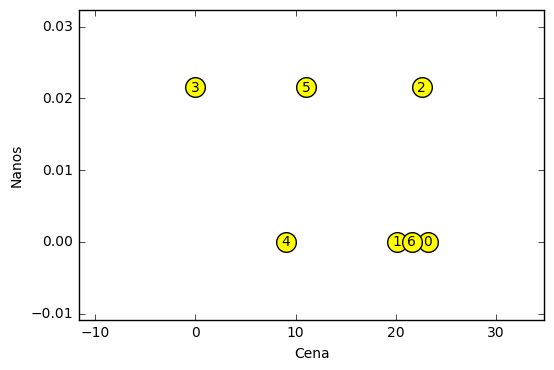

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def drawMap(catx, caty):
    xdata=list(weightedData[catx])
    ydata=list(weightedData[caty])
    names =['Revlon',
 "L'Oreal",
 'Rimmel',
 'Kylie Cosmetics',
 'ABH',
 'Jeffree Star',
 'Maybelline']
    print("Legend:")
    plt.scatter(xdata,ydata, marker='o', c='yellow', s=200)
    for i in range(len(names)):
        print("%i: %s"%(i,names[i]))
        plt.annotate(
        i, 
        xy = (xdata[i], ydata[i]), xytext=(xdata[i], ydata[i]), ha = 'center', va = 'center')
    plt.xlim([min(xdata)-0.5*max(xdata), max(xdata)+0.5*max(xdata)]) #0.5 ker je toliko širina kroga
    plt.ylim([min(ydata)-0.5*max(ydata), max(ydata)+0.5*max(ydata)])
    plt.xlabel(catx)
    plt.ylabel(caty)
    plt.show()
drawMap("Cena","Nanos")
    
    

Zgoraj sem izdelal funkcijo za izris map diagrama. Zgoraj je npr. izrisan diagram koristnosti nanosa in cene.

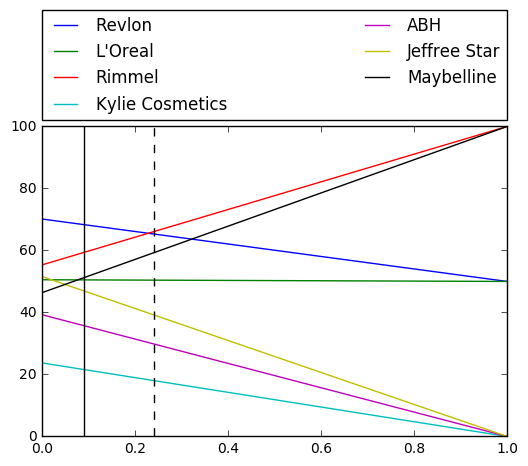

In [160]:
def drawSensitivity(catx):
    xdata=list(weightedData[catx]) 
    names =['Revlon',
 "L'Oreal",
 'Rimmel',
 'Kylie Cosmetics',
 'ABH',
 'Jeffree Star',
 'Maybelline']
    for i in range(len(xdata)):
        x1=weights[catx]
        x2=1
        y1=sumsraw[i]
        y2=data[catx][i]
        k=(y2-y1)/(x2-x1)
        n=y2-k*x2
        y0=k*0+n
        plt.plot([0,x2],[y0,y2], label=names[i])
    #plt.plot([x1,100])
    #plt.legend(loc='upper right')
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
    plt.plot([x1,x1],[0,100],'k-')
    plt.plot([x1+0.15,x1+0.15],[0,100],'k--')
    plt.plot([x1-0.15,x1-0.15],[0,100],'k--')
    plt.xlim([0,1])
    plt.ylim([0,100])
    plt.show()
drawSensitivity("Vlazilnost")